In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from textwrap import wrap
%matplotlib inline
    
### Read in required data
df=pd.read_csv('WDIData_T.csv')
supdata=pd.read_csv('WDI_csv/WDICountry.csv')

### Remove agrregated data
c_exclude='|'.join(supdata[supdata['Currency Unit'].isna()]['Country Code'].unique().tolist())
data = df[~df['CountryCode'].str.contains(c_exclude)]

In [2]:
# Setup Masks For Slicing Data
co2_indicator = r'CO2 emissions \(metric'
co2kt_indicator = r'CO2 emissions \(kt'
totGHG_indicator = r'Total greenhouse gas emissions \(kt of CO2'
hist_country = 'USA|GBR|FRA|CHN|JPN|DEU|IND|ITA|BRA|CAN'
totFuel='CO2 emissions from gaseous fuel consumption|CO2 emissions from liquid fuel consumption|CO2 emissions from solid fuel consumption'

mask1 = data['IndicatorName'].str.contains(co2_indicator)
mask1kt = data['IndicatorName'].str.contains(co2kt_indicator)
mask1GHG = data['IndicatorName'].str.contains(totGHG_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)
mask3 = data['Year'] == 1960
mask4 = data['Year'] == 1970
mask5 = data['Year'] == 2006
mask6 = data['Year'] == 2011
mask7 = data['Year'] == 2016
mask1Fuel = data['IndicatorName'].str.contains(totFuel)

# Create masks for top ten countries (GDP)
hist_indicator = r'CO2 emissions \(metric'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
co2_stage = data[mask1]
co2_stage.head()

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199)] 
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

# plot functions
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-4)

formatterK = FuncFormatter(thousands)

def lineplot(data,countrylist,HorizPlots,PlotNo,Xmin,Xmax,Ymin,Ymax,Type):
    plt_vals=[]
    ax=plt.subplot(1, HorizPlots, PlotNo)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_yaxis().tick_left()
    if Type == 0:
        ax.spines["left"].set_visible(False)
        for y in range(5, 30, 5):
            plt.plot(range(1959, 2021), [y] * len(range(1959, 2021)), "--", lw=1.0, color="black", alpha=0.3)
        for i, col in enumerate(countrylist):
            plt_vals = data.loc[data['CountryCode'] == col]
            ax.plot(plt_vals['Year'].values, plt_vals['Value'].values, linewidth=1.5, color=tableau20[i])
            y_pos = plt_vals['Value'].values[-1] -0.3
            if plt_vals['CountryCode'].iloc[0] == 'USA':
                y_pos +=0.3
            elif plt_vals['CountryCode'].iloc[0] == 'JPN':
                y_pos +=0.3
            elif plt_vals['CountryCode'].iloc[0] == 'DEU':
                y_pos -=0.3
            elif plt_vals['CountryCode'].iloc[0] == 'BRA':
                y_pos +=0.3
            elif plt_vals['CountryCode'].iloc[0] == 'GBR':
                y_pos +=0.3
            plt.text(2016.5, y_pos, plt_vals['CountryName'].iloc[0], fontsize=12, color=tableau20[i])
        plt.title('CO2 Emissions (metric tons per capita)')
    
    if Type == 1:
        ax.set_xticks(ticks=[2006,2011,2016])
        ax.set_ylabel(data['IndicatorName'].iloc[0],fontsize=12)
        
        for i, col in enumerate(countrylist):
            plt_vals = data.loc[data['CountryCode'] == col]
            ax.plot(plt_vals['Year'].values, plt_vals['Value'].values, linewidth=1.5, color=tableau20[-1-i], marker ='o')
            y_pos = plt_vals['Value'].values[-1] -0.3
            x_pos = 2016.5
            if plt_vals['CountryCode'].iloc[0] == 'SAU':
                y_pos -=2.0
            elif plt_vals['CountryCode'].iloc[0] == 'TTO':
                y_pos -=1.0
            elif plt_vals['CountryCode'].iloc[0] == 'BHR':
                y_pos -=1.0
            elif plt_vals['CountryCode'].iloc[0] == 'ARE':
                y_pos +=1.0
            elif plt_vals['CountryCode'].iloc[0] == 'BRN':
                y_pos -=1.0
            elif plt_vals['CountryCode'].iloc[0] == 'GIB':
                x_pos +=4.5
                y_pos +=0.3
            plt.text(x_pos, y_pos, plt_vals['CountryName'].iloc[0], fontsize=12)
    
    if Type == 2:
        ax.set_yscale('log')
        ax.set_yticks(ticks=[1e3,1e5,1e7])
        ax.set_xticks(ticks=[2006,2011,2016])
        ax.set_ylabel(data['IndicatorName'].iloc[0],fontsize=12)
        ax.yaxis.set_major_formatter(formatterK)
        
        for i, col in enumerate(countrylist):
            plt_vals = data.loc[data['CountryCode'] == col]
            ax.plot(plt_vals['Year'].values, plt_vals['Value'].values, lw=1.5, marker='o', c=tableau20[i])
            y_pos = plt_vals['Value'].values[-1]
            if plt_vals['CountryCode'].iloc[0] == 'IDN':
                y_pos *=0.78
            elif plt_vals['CountryCode'].iloc[0] == 'SAU':
                y_pos *=0.90
            elif plt_vals['CountryCode'].iloc[0] == 'KOR':
                y_pos *=0.93
            elif plt_vals['CountryCode'].iloc[0] == 'DEU':
                y_pos *=1.05
            plt.text(2016.5, y_pos, plt_vals['CountryName'].iloc[0], fontsize=12)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axis([Xmin,Xmax,Ymin,Ymax])
    
def scatterplot(data1,data2,countrylist1,countrylist2,HorizPlots,PlotNo,Xmin,Xmax,Ymin,Ymax,Type):
    i=0
    X = data1['Value']
    Y = data2['Value']
    X2 = data1['Value'][data1['CountryCode'].str.contains(countrylist1)]
    Y2 = data2['Value'][data2['CountryCode'].str.contains(countrylist1)]
    if Type == 1:
        X3 = data1['Value'][data1['CountryCode'].str.contains(countrylist2)]
        Y3 = data2['Value'][data2['CountryCode'].str.contains(countrylist2)]
    a = [i for i in range(0, int(Xmax))]
    ax = plt.subplot(1,HorizPlots,PlotNo) 
    if Type == 0:
        ax.scatter(X, Y, color=tableau20[1], edgecolor='black', s=70, marker='^')
        ax.scatter(X2, Y2, color=tableau20[-3], edgecolor='black', s=150)
    elif Type == 1:
        ax.scatter(X, Y, color=tableau20[1], edgecolor='black', s=70, marker='^')
        ax.scatter(X2, Y2, color=tableau20[-3], edgecolor='black', s=150)
        ax.scatter(X3, Y3, color=tableau20[-11], edgecolor='black', s=150)
    ax.plot(a, color='black', lw=0.5)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='minor', bottom=False, left=False)
    ax.set_xlabel(str(data1['Year'].iloc[0])+' '+data1['IndicatorName'].iloc[0],fontsize=12)
    ax.set_ylabel('2016 '+data2['IndicatorName'].iloc[0],fontsize=12)
    if Type == 0:
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(ScalarFormatter())
    elif Type == 1:
        ax.set_xticks(ticks=[1e3,1e5,1e7])
        ax.set_yticks(ticks=[1e3,1e5,1e7])
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(formatterK)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axis([Xmin,Xmax,Ymin,Ymax])

def hBar(Val,Country,PlotNo,Title):
    X=[x for x, _ in enumerate(Val)]
    Y = np.array(Val)
    ax=plt.subplot(1, 5, PlotNo) 
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    for i, col in enumerate(Country):
        ax.text(29, i-0.1, str(int(round(Val.values[i])))+'%', fontsize=12)
    ax.barh(X,Y,color=tableau20[9])
    plt.title(("\n".join(wrap(Title, 15))))
    if PlotNo==1:
        plt.yticks(X, Country, wrap=True, fontsize=12)
    else:
        plt.yticks([])
    plt.xticks(fontsize=12)
    plt.xlim(0,60)

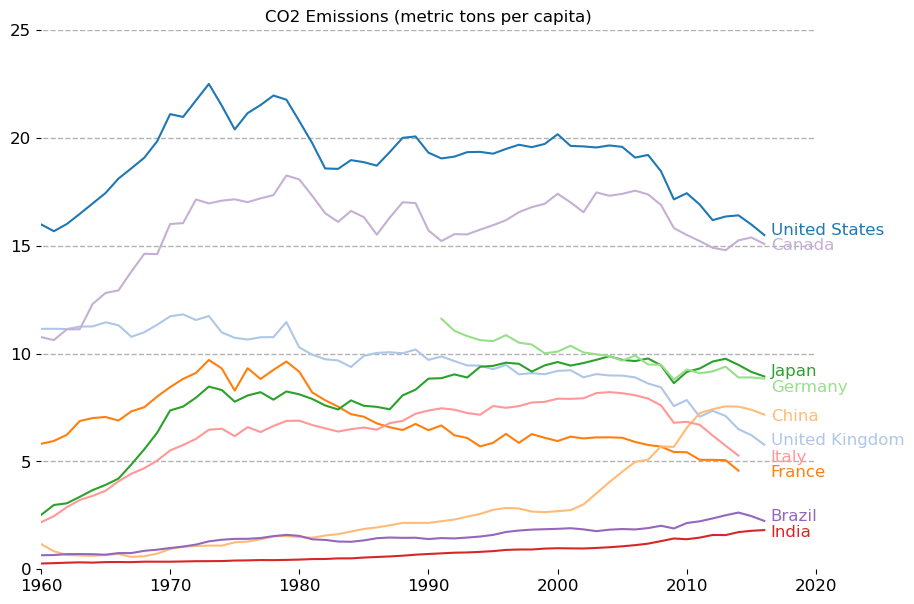

In [3]:
# Plot 1 Data
stage1co = data[mask1 & mask2]

countrylist = hist_country.split('|')
plt.figure(figsize=(10,7))
lineplot(stage1co,countrylist,1,1,1960,2020,0,25,0)
plt.show()

This visualization was created to ascertain the emissions levels of each of the top 10 countries, in terms of GDP, but does not really significantly assist in answering the questions posed in the introduction. As you will see later GDP does not directly translate to the highest ***```CO2 emissions```*** or ***```CO2 emissions per capita```***.
<br>
<br>
Before we move on it should be highlighted that in this particular notebook we will only be focusing on some of the ***```CO2 emissions```*** indicators the list below.

I will only be focusing on some of the CO2 emissions indicators the list below

In [6]:
indicators=data['IndicatorName'].unique().tolist()
[indicator for indicator in indicators if 'CO2 emissions' in indicator]


['CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions (kg per 2010 US$ of GDP)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg 

In [7]:
# Plot 2 & 3 Data
co2_1970 = data[mask1 & mask4]
co2_2006 = data[mask1 & mask5]
co2_2016 = data[mask1 & mask7]
temp1=co2_1970['CountryCode'].unique().tolist()
temp2=co2_2006['CountryCode'].unique().tolist()
temp3=co2_2016['CountryCode'].unique().tolist()
co2_country=set(temp1)&set(temp2)&set(temp3)
co2_country="|".join(co2_country)
mask8 = data['CountryCode'].str.contains(co2_country)
co2_1970 = data[mask1 & mask4 & mask8]
co2_2006 = data[mask1 & mask5 & mask8]
co2_2016 = data[mask1 & mask7 & mask8]

# Plot 4 Data
T10_country='|'.join(data[mask1 & mask7][['CountryCode',
                                          'Value']].sort_values(by='Value',
                                                                ascending=False)[:10]['CountryCode'].tolist())
mask9 = data['CountryCode'].str.contains(T10_country)
stage2co = data[mask1 & mask9 & (mask5 | mask6 | mask7)]

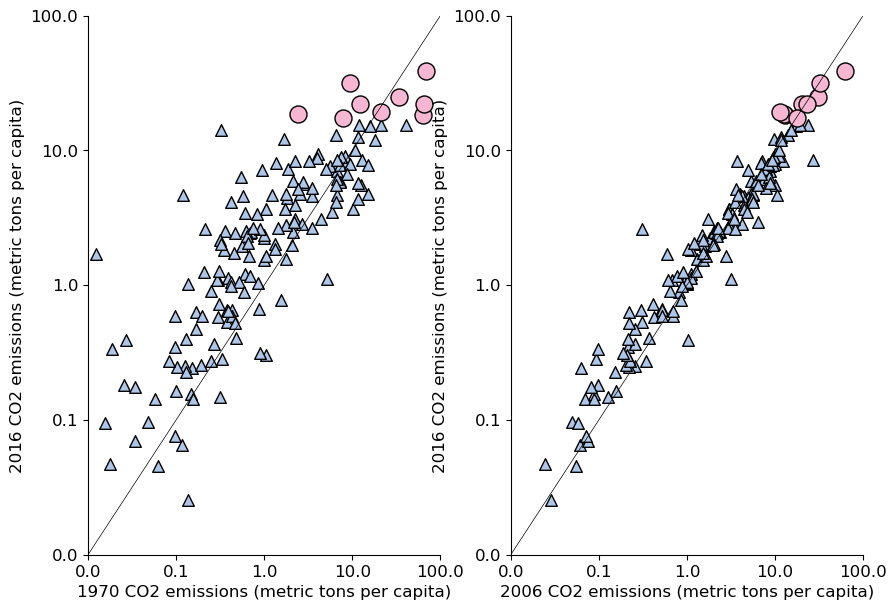

In [8]:
plt.figure(figsize=(10,7))
scatterplot(co2_1970,co2_2016,T10_country,T10_country,2,1,0.01,100, 0.01,100,0)
scatterplot(co2_2006,co2_2016,T10_country,T10_country,2,2,0.01,100, 0.01,100,0)
plt.show()

In [9]:
emissions_ratio1670 = co2_2016['Value'].values / co2_1970['Value'].values
emissions_ratio1606 = co2_2016['Value'].values / co2_2006['Value'].values
tempdf=pd.DataFrame({'% of Countries that have increased CO2 emissions (metric ton per capita) (1970-2016)':[(emissions_ratio1670 >= 1).sum() / len(emissions_ratio1670)*100],
                     '% of Countries that have increased CO2 emissions (metric ton per capita) (2006-2016)':[(emissions_ratio1606 >= 1).sum() / len(emissions_ratio1606)*100]})
tempdf.head()

,% of Countries that have increased CO2 emissions (metric ton per capita) (1970-2016),% of Countries that have increased CO2 emissions (metric ton per capita) (2006-2016)
0,72.560976,58.536585


72.5% of countries have seen an increase in ***```CO2 emissions per capita```*** when comparing their emissions from 1970 to 2016. If we carry out similar assessmetn for the timeframe between 2006 to 2016 we still find that 58.5% of countries have seen an increase in ***```CO2 emissions per capita```***, although the magnitude of change is less when compared with the previously assessed timeframe it is still a discouraging trend when viewed from the perspective of combating global warming. The pick circles are used to highlight the top ten polluting countries which are named in the next visulization.

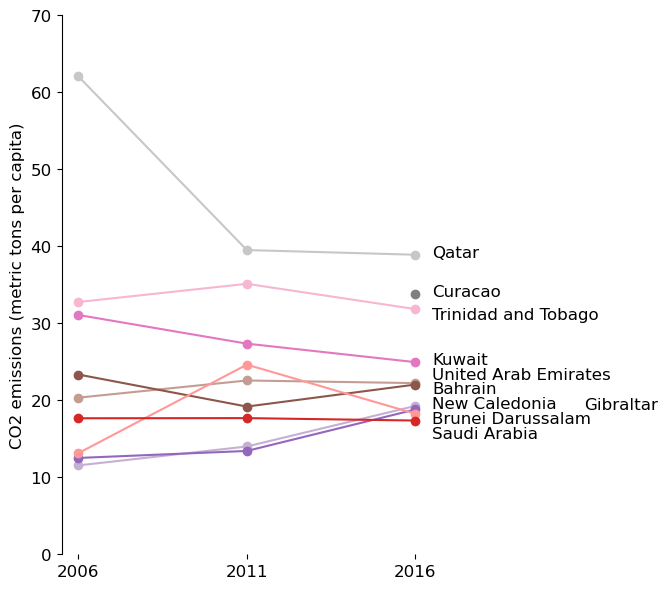

In [11]:
countrylist = T10_country.split('|')
plt.figure(figsize=(5,7))
lineplot(stage2co,countrylist,1,1,2005.5,2017,0,70,1)
plt.show()

Of the top ten polluting countries (in 2016 in terms of CO2 emission per capita) **Qatar, Kuwait, Trinidad and Tobago, Saudi Arabia** can considered to have a steady or decreasing trend, while **United Arab Emirates, Bahrain, New Caledonia, Gibraltar, Brunei Darussalam** has an increasing trend.

In [13]:
# Plot 5 & 6 Data
co2kt_1970 = data[mask1kt & mask4]
co2kt_2006 = data[mask1kt & mask5]
co2kt_2016 = data[mask1kt & mask7]
temp1=co2kt_1970['CountryCode'].unique().tolist()
temp2=co2kt_2006['CountryCode'].unique().tolist()
temp3=co2kt_2016['CountryCode'].unique().tolist()
co2kt_1970 = data[mask1kt & mask4 & data['CountryCode'].str.contains("|".join(set(temp1)&set(temp2)&set(temp3)))]
co2kt_2006 = data[mask1kt & mask5 & data['CountryCode'].str.contains("|".join(set(temp1)&set(temp2)&set(temp3)))]
co2kt_2016 = data[mask1kt & mask7 & data['CountryCode'].str.contains("|".join(set(temp1)&set(temp2)&set(temp3)))]

# Plot 7 Data
T10kt_country='|'.join(data[mask1kt & mask7][['CountryCode','Value']].sort_values(by='Value',ascending=False)[:10]['CountryCode'].tolist())
mask10 = data['CountryCode'].str.contains(T10kt_country)
stage2cokt = data[mask1kt & mask10 & (mask5 | mask6 | mask7)]

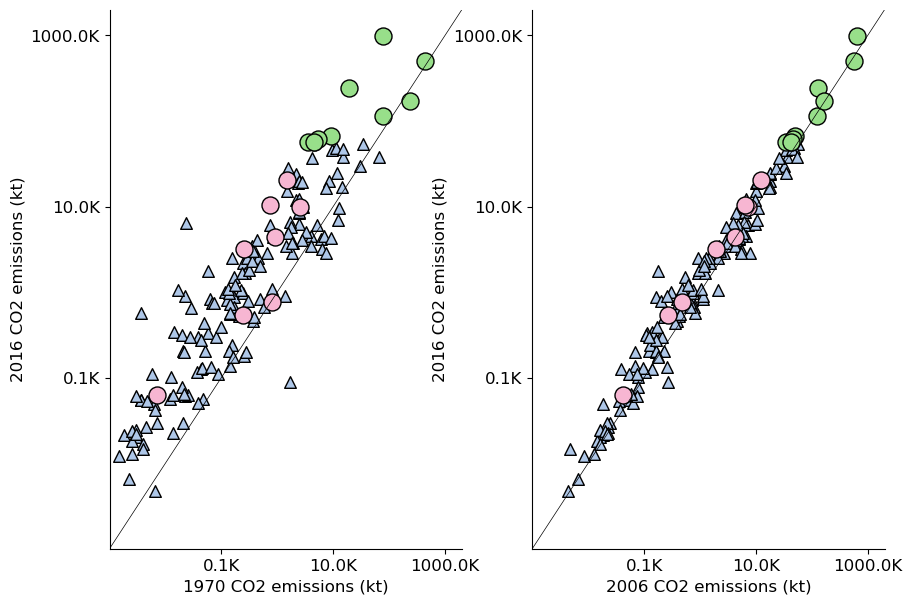

In [14]:
plt.figure(figsize=(10,7))
scatterplot(co2kt_1970,co2kt_2016,T10_country,T10kt_country,2,1,10,2e7,10,2e7,1)
scatterplot(co2kt_2006,co2kt_2016,T10_country,T10kt_country,2,2,10,2e7,10,2e7,1)
plt.show()

In [15]:
emissionskt1670_ratio = co2kt_2016['Value'].values / co2kt_1970['Value'].values
emissionskt1606_ratio = co2kt_2016['Value'].values / co2kt_2006['Value'].values
tempemis1=(emissionskt1670_ratio >= 1).sum() / len(emissionskt1670_ratio)*100
tempemis2=(emissionskt1606_ratio >= 1).sum() / len(emissionskt1606_ratio)*100
gtopmean=(stage2cokt['Value'][stage2cokt['Year'] == 2016]).mean() / (stage2co['Value'][stage2co['Year'] == 2016]).mean()
tempdf2=pd.DataFrame({'% of Countries that have increased CO2 emissions (1970-2016)':[tempemis1],
                      '% of Countries that have increased CO2 emissions (2006-2016)':[tempemis2]})
tempdf2.head()

,% of Countries that have increased CO2 emissions (1970-2016),% of Countries that have increased CO2 emissions (2006-2016)
0,89.090909,75.757576


89.1% of countries have seen an increase in absolute CO2 emissions (kt) when comparing their emissions from 1970 to 2016, Top ten polluting countries in terms of ***```CO2 emissions (kt)```*** shown as green circles and top ten polluting countries in terms of ***```CO2 emissions (metric ton per capita)```*** in pink. This highlights a danger in only viewing emissions in terms of per capita only, for example the mean difference between the countries in green and pink is 94217 times when viewed in terms of ***```CO2 emissions (kt)```***.

75.5% of countries have seen an increase in absolute CO2 emissions (kt) when comparing their emissions from 2006 to 2016.

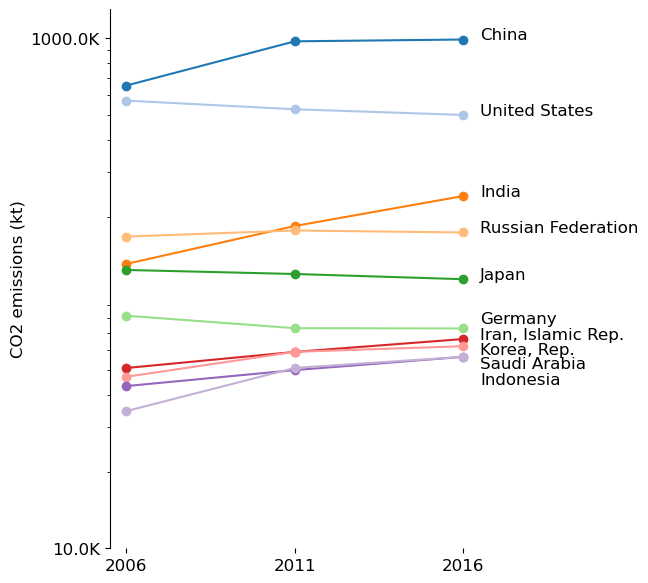

In [17]:
plt.figure(figsize=(5,7))
countrylist = T10kt_country.split('|')
lineplot(stage2cokt,countrylist,1,1,2005.5,2017,1e5,1.3e7,2)
plt.show()

Of the top ten polluting countries in terms of “CO2 emissions (kt)” in 2016, **United States, Russian Federation, Japan, Germany** have a steady to decreasing trend. Whereas **China, India, Iran, Korea, Saudi Arabia, Indonesia** has an increasing trend.

In [19]:
# Setup masks for data
totFuel_ind=data['IndicatorName'].str.contains('of total fuel combustion')
yearMask=data['Year'] == 2014
TotFuelC=data[yearMask & totFuel_ind]

# Manipulate Data For Next Set Of Graphs
mElecHeat='CO2 emissions from electricity and heat production'
mManfIndsConst='CO2 emissions from manufacturing industries and construction'
mOtherSec='CO2 emissions from other sectors, excluding residential buildings and commercial and public services'
mResid='CO2 emissions from residential buildings and commercial and public services'
mTrans='CO2 emissions from transport'
T10kt_mask=TotFuelC['CountryCode'].str.contains(T10kt_country)
mEHVal=TotFuelC['Value'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mElecHeat)]
mMICVal=TotFuelC['Value'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mManfIndsConst)]
mOtherVal=TotFuelC['Value'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mOtherSec)]
mResidVal=TotFuelC['Value'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mResid)]
mTransVal=TotFuelC['Value'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mTrans)]
mEHCountry=TotFuelC['CountryName'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mElecHeat)]
mMICCountry=TotFuelC['CountryName'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mManfIndsConst)]
mOSCountry=TotFuelC['CountryName'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mOtherSec)]
mRCountry=TotFuelC['CountryName'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mResid)]
mTransCountry=TotFuelC['CountryName'][T10kt_mask & TotFuelC['IndicatorName'].str.contains(mTrans)]

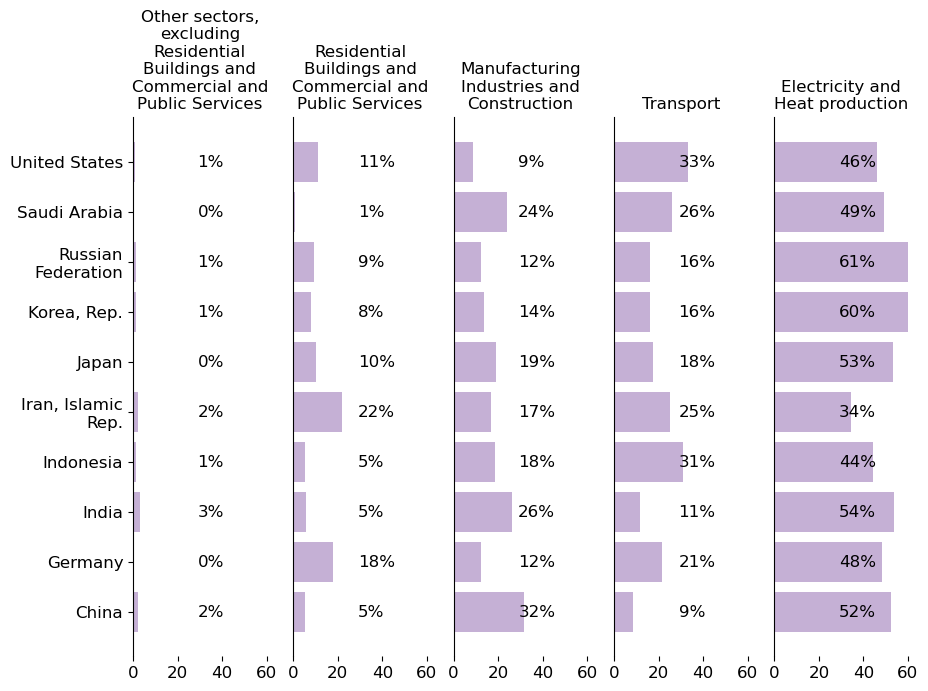

In [20]:
plt.figure(figsize=(10,7))
hBar(mEHVal,mEHCountry,5,'Electricity and Heat production')
hBar(mTransVal,mEHCountry,4,'Transport')
hBar(mMICVal,mEHCountry,3,'Manufacturing Industries and Construction')
hBar(mResidVal,mEHCountry,2,'Residential Buildings and Commercial and Public Services')
hBar(mOtherVal,mEHCountry,1,'Other sectors, excluding Residential Buildings and Commercial and Public Services')
plt.show()

Transport, electricity and heat production account for an average of 70.93% of emissions of the top ten CO2 emitters (kt). Although there can be significant per sector emission differences between the different countries dependant on the type of economy they have.

# Summary of Findings
* Depending on the timeframes being reviewed, ```2006 to 2016``` or ```1970 to 2016``` respectively, between 58.5% to 72.5% of countries have seen an increase in ***```CO2 emissions (metric tons per capita)```***.
* Similarly when this analysis is carried out for absolute ***```CO2 emission (kt)```***, between 75% to 89% of countries have seen an increase in emissions.
* Although for both different emissions measurement metrics the magnitude of change for 2006 to 2016 is less than 1970 to 2016, nevertheless the trend is still increasing.
* ***```CO2 emissions (metric ton per capita)```*** is good metric for measuring relative improvements between countries with different population sizes, however absolute ***```CO2 emissions (kt)```*** is the most important metric when considering which countries have the most impact on global emissions.
* Transport, electricity and heat production account for an average of 70.93% of emissions of the top ten CO2 emitters. Although there can be significant per sector emission differences between the different countries dependant on the type of economy they have. Generally there could be significant emissions reductions if adoption of renewable energy sources and electrical vehicles could be accelerated.
 